# Zadanie domowe - EDA Danych dotyczących Irysów  
m04z01  
Krzysztof Wąsik

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('25__iris.csv', sep=",")

## Ogólny przegląd danych

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   długość kielicha (sepal length)   150 non-null    float64
 1   szerokość kielicha (sepal width)  150 non-null    float64
 2   długość płatka (petal length)     150 non-null    float64
 3   szerokość płatka (petal width)    150 non-null    float64
 4   klasa (class)                     150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Dane zawierają 150 rekordów. Opisują wymiary kielicha i płatków kwiatów irysa danego gatunku. Z opisu zadania wiadomo, że wymiary są podane w centymetrach.

## Transformacje danych
Kolumny mają zarówno polskie jak i angielskie nazwy. Dla uproszczenia analizy zmieniam długie (polsko-angielskie) nazwy kolumn na angielskie.

In [4]:
df = df.rename(columns={
    "długość kielicha (sepal length)": "sepal_length",
    "szerokość kielicha (sepal width)": "sepal_width",
    "długość płatka (petal length)": "petal_length",
    "szerokość płatka (petal width)": "petal_width",
    "klasa (class)": "class"
})
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

## Ogólny przegląd danych (ciąg dalszy)

In [5]:
df.nunique()

sepal_length    35
sepal_width     23
petal_length    43
petal_width     22
class            3
dtype: int64

W kolumnie 'class' występują 3 różne wartości, więc dane opisują kwiatostany 3 różnych gatunków irysa.<br>

In [6]:
df["class"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

Na każdy gatunek irysa przypada równa liczba rekordów czyli mamy do czynienia z bardzo dobrze zbalansowanym zbiorem danych. To dobrze, bo zapewnia to równą reprezentację poszczególnych kategorii i wpływa pozytywnie na wiarygodność wyciąganych wniosków.<br>
50 rekordów na klasę może być wystarczające do uzyskania wiarygodnych wyników, szczególnie jeśli cechy są dobrze rozproszone i reprezentatywne dla danej klasy.

Widać niewielką rożnorodność wartości zwłaszcza dla kolumn 'sepal width' i 'petal width', pomimo typu zmiennoprzecinkowego. Jest raczej mało prawdopodobne, że wymiary rośliny będą miały charakter dyskretny. Może to bardziej wynikać z metody pomiaru, niedokładności pomiaru, nieregularności mierzonego kształtu itp. Możliwe, że zakresy wartości z kolumn o mniejszej różnorodności są mniejsze niż pozostałych co może się przekładać zwyczajnie na większą powtarzalność tych samych wartości.

In [7]:
df_stat = df.describe().transpose()[["min", "max"]]
df_stat["range"] = df_stat["max"] - df_stat["min"]
df_stat

,min,max,range
sepal_length,4.3,7.9,3.6
sepal_width,2.0,4.4,2.4
petal_length,1.0,6.9,5.9
petal_width,0.1,2.5,2.4


Nawiązując do poprzedniego sprawdzenia, widać wyraźnie mniejszy zakres wartości dla kolumn 'sepal width' i 'petal width'. To może tłumaczyć mniejszą różnorodność wartości.

Warto przy okazji sprawdzić czy mała różnorodność wyników nie jest spowodowana błędnymi duplikatami rekordów.

In [8]:
df[df.duplicated(keep=False)].value_counts()

sepal_length  sepal_width  petal_length  petal_width  class         
4.9           3.1          1.5           0.1          Iris-setosa       3
5.8           2.7          5.1           1.9          Iris-virginica    2
dtype: int64

Duplikaty istotnie występują, ale ich liczba nie jest aż tak duża aby wzbudzała podejżenie błędnych danych. Taka sytuacja w zbiorze o tej liczności po prostu mogła mieć miejsce.

Jeszcze sprawdźmy z jaką dokładnością zostały wykonane pomiary.

In [9]:
# Function to calculate the number of decimal places
def count_decimal_places(value):
    # Convert the value to string and split by the decimal point
    str_value = str(value)
    if '.' in str_value:
        return len(str_value.split('.')[1])
    else:
        return 0

# Dictionary to store the maximum number of decimal places for each numerical column
decimal_places = {}

# Iterate over each column in the DataFrame
for column in df.select_dtypes(include=['float64']).columns:
    # Calculate the maximum number of decimal places in the column
    max_decimals = df[column].apply(count_decimal_places).max()
    decimal_places[column] = max_decimals

decimal_places

{'sepal_length': 1, 'sepal_width': 1, 'petal_length': 1, 'petal_width': 1}

Jak widać wszystkie wymiary są podane z dokładnością do 1 miejsca po przecinku a więc 1 mm.

In [10]:
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Na próbce można zauważyć że wartości kolumny 'class' są pogrupowane indeksami.  

In [11]:
df['class'].is_monotonic_increasing or df['class'].is_monotonic_decreasing

True

Takie uporządkowanie występuje w całym zbiorze tj. pierwsze 50 rekordów opisuje jeden gatunek, kolejne 50 rekordów następny itd.

In [12]:
df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,class
133,6.3,2.8,5.1,1.5,Iris-virginica
68,6.2,2.2,4.5,1.5,Iris-versicolor
5,5.4,3.9,1.7,0.4,Iris-setosa
98,5.1,2.5,3.0,1.1,Iris-versicolor
0,5.1,3.5,1.4,0.2,Iris-setosa
12,4.8,3.0,1.4,0.1,Iris-setosa
106,4.9,2.5,4.5,1.7,Iris-virginica
1,4.9,3.0,1.4,0.2,Iris-setosa
58,6.6,2.9,4.6,1.3,Iris-versicolor
30,4.8,3.1,1.6,0.2,Iris-setosa


W losowej próbce widać już pewne prawidłowości:  
- wartości 'sepal length' są wyraźnie mniejsze dla gatunku setosa;
- wartości 'sepal width' są zbliżone;
- wartości 'petal length' są wyraźnie najmniejsze dla gatunku setosa a największe dla virginica;
- wartości 'petal width' są wyraźnie najmniejsze dla gatunku setosa a największe dla virginica;

Daje to spore szanse na dokładną rozróżnialność gatunków na podstawie co najmniej 3 z 4 cech.

In [13]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


Mediana dla większości cech jesb bliska średniej co świadczy o symetryczności rozkładów wartości. Dla cechy 'petal length' widać większe zagęszczenie w 3 ćwiartce rozkładu (mediana wyraźnie większa niż średnia).<br>
Dla cechy 'petal length' **std** wyraźnie bardziej rozproszone niż **std** pozostałych cech.

## Analiza brakujących wartości

In [14]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

Dane są kompletne. Nie zawierają brakujących wartości. To dobrze bo dzięki temu wyniki analizy będą dokładniejsze. 

## Analiza pojedynczych zmiennych

### Analiza sepal_width

Text(0.5, 1.0, 'Histogram zbiorczy sepal_width dla wszystkich gatunków')

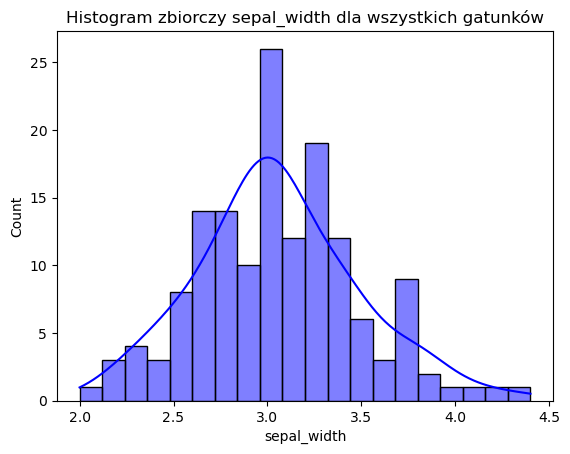

In [15]:
colName = 'sepal_width'
sns.histplot(df[colName], kde=True, color='blue', bins=20)
plt.title(f'Histogram zbiorczy {colName} dla wszystkich gatunków')

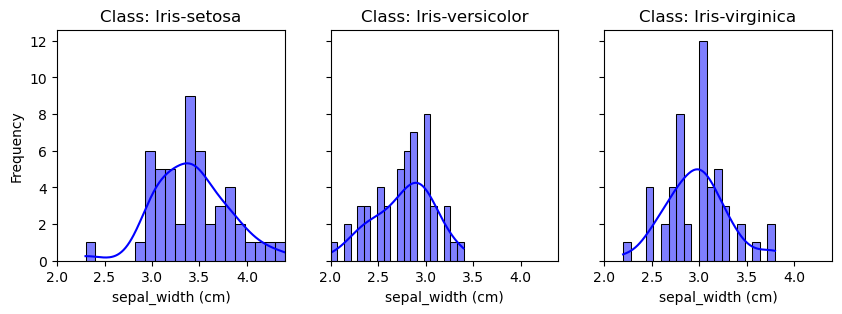

In [16]:
col_name = 'sepal_width'

# Create a histogram for each unique class
unique_classes = df['class'].unique()

# Set up the plot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3), sharey=True)

# Iterate over each unique class and create a histogram
for ax, iris_class in zip(axes, unique_classes):
    subset = df[df['class'] == iris_class]
    sns.histplot(subset[col_name], kde=True, ax=ax, color='blue', bins=20)
    ax.set_xlim(df[col_name].min(), df[col_name].max())# I need to see every chart with the same X scale to easier compare
    ax.set_title(f'Class: {iris_class}')
    ax.set_xlabel(col_name + ' (cm)')
    ax.set_ylabel('Frequency')

Text(0.5, 0, 'sepal_width (cm)')

<Figure size 1000x600 with 0 Axes>

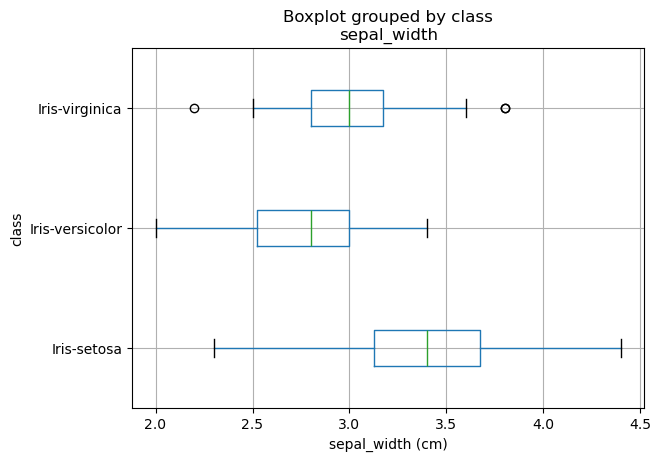

In [17]:
col_name = 'sepal_width'
plt.figure(figsize=(10, 6))
df.boxplot(column=col_name, by='class', vert=False)
plt.xlabel(f'{col_name} (cm)')

* Wartości dla gatunku 'setosa' przeważają z prawej strony wykresu tj. wartości najwyższych. Wykres symetryczny, wartości lekko rozproszone na prawo, w kierunku maks.  
* 'Virginica' po środku. Wykres w miarę symetryczny. Występują wartości odstające (outliers) po obu stronach zakresu.
* 'Versicolor' w okolicy wartości najniższych. Wykres lekko asymetryczny, wartości bardziej rozproszone na lewo, w kierunku min.

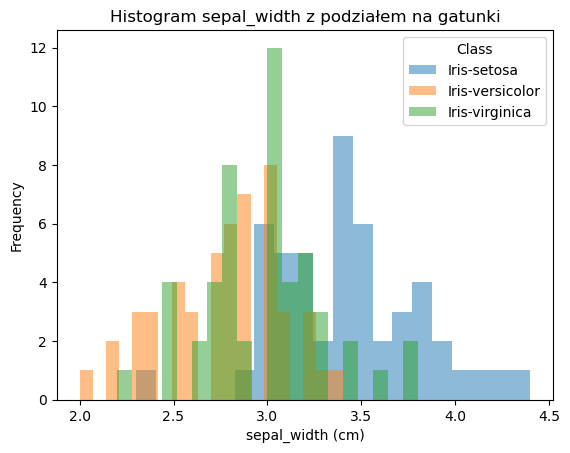

In [18]:
col_name = 'sepal_width'
for class_name, group in df.groupby('class'):
    group[col_name].plot(kind='hist', alpha=0.5, label=class_name, bins=20)
    
plt.title(f'Histogram {col_name} z podziałem na gatunki')
plt.xlabel(f'{col_name} (cm)')
plt.ylabel('Frequency')
plt.legend(title='Class')

Najwięcej wartości dla wszystkich gatunków występuje w okolicy 3.0.<br>
Rozróżnienie gatunków przy użyciu jedynie tej cechy, w wielu przypadkach może być trudne (wartości bliskie 3.0, które wypadają najczęściej w każdym gatunku).  
Największa rozróżnialność gatunków będzie występowała dla wartości z I i IV ćwiartki. W IV ćwiartce występuje już praktycznie tylko setosa.
W otoczeniu I kwartyla będą występowały z podobnym prawdopodobieństwem gatunki virginica i versicolor. Z przewagą drugiego w miarę zbliżania się do wartości minimalnych. Setosa w tym obszarze nie występuje.

### Analiza sepal_length

Text(0.5, 1.0, 'Histogram zbiorczy sepal_length dla wszystkich gatunków')

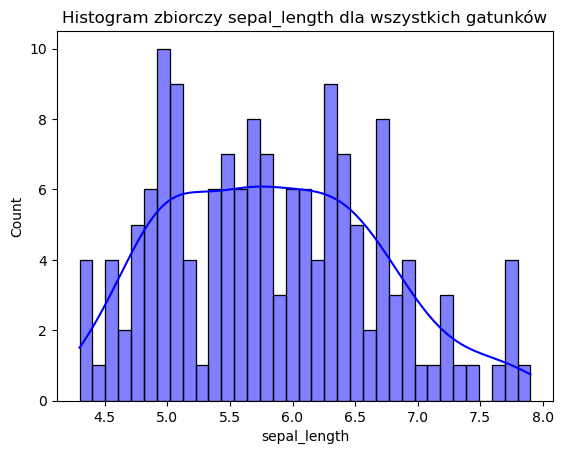

In [19]:
colName = 'sepal_length'
sns.histplot(df[colName], kde=True, color='blue', bins=35)
plt.title(f'Histogram zbiorczy {colName} dla wszystkich gatunków')

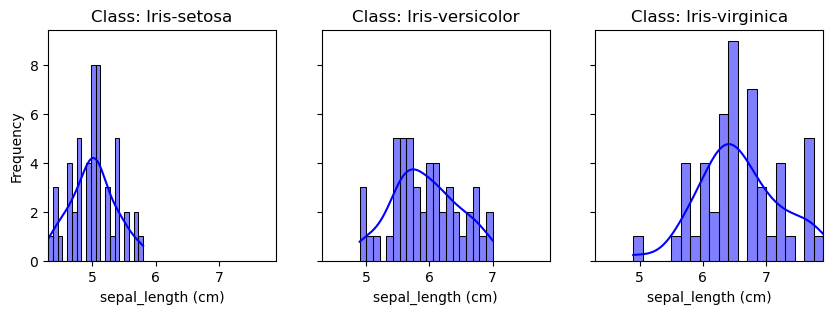

In [20]:
col_name = 'sepal_length'

# Create a histogram for each unique class
unique_classes = df['class'].unique()

# Set up the plot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3), sharey=True)

# Iterate over each unique class and create a histogram
for ax, iris_class in zip(axes, unique_classes):
    subset = df[df['class'] == iris_class]
    sns.histplot(subset[col_name], kde=True, ax=ax, color='blue', bins=20)
    ax.set_xlim(df[col_name].min(), df[col_name].max())# I need to see every chart with the same X scale to easier compare
    ax.set_title(f'Class: {iris_class}')
    ax.set_xlabel(col_name + ' (cm)')
    ax.set_ylabel('Frequency')

Text(0.5, 0, 'sepal_length (cm)')

<Figure size 1000x600 with 0 Axes>

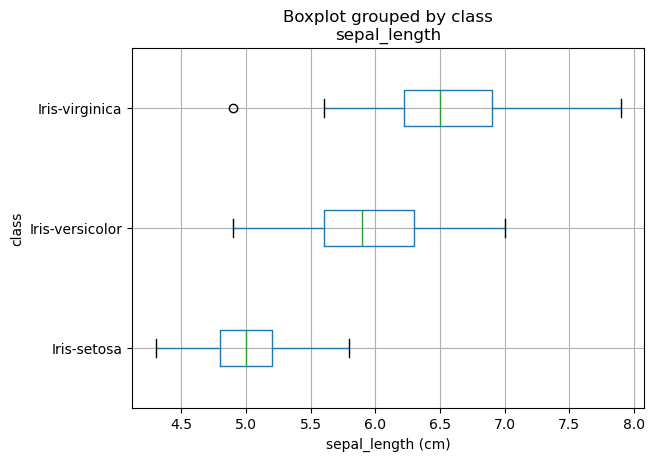

In [21]:
col_name = 'sepal_length'
plt.figure(figsize=(10, 6))
df.boxplot(column=col_name, by='class', vert=False)
plt.xlabel(f'{col_name} (cm)')

* Wartości dla gatunku 'setosa' przeważają z lewej strony wykresu tj. wartości najniższych. Wykres symetryczny.
* Versicolor po środku. Wykres asymetryczny, wartości bardziej rozproszone na prawo, w kierunku max.
* Virginica w okolicy wartości najwyższych. Wykres w miarę symetryczny. Lekka dominacja prawej strony w okolicy wartości maksymalnych. Występują wartości odstające (outliers) po stronie minimum.

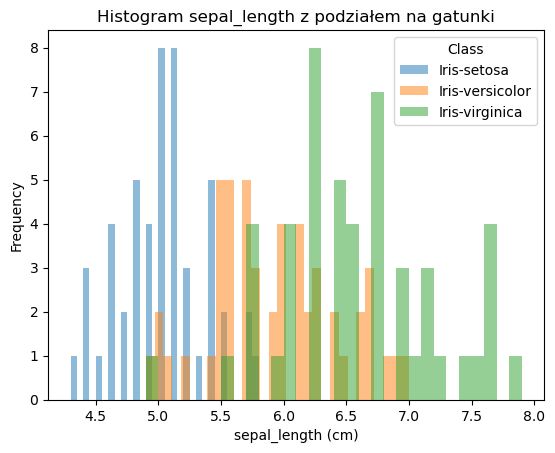

In [22]:
col_name = 'sepal_length'
for class_name, group in df.groupby('class'):
    group[col_name].plot(kind='hist', alpha=0.5, label=class_name, bins=30)
    
plt.title(f'Histogram {col_name} z podziałem na gatunki')
plt.xlabel(f'{col_name} (cm)')
plt.ylabel('Frequency')
plt.legend(title='Class')

W I i IV ćwiartce rozkładu widać bardzo dobrą rozróżnialność gatunków. W I ćwiartce występuje jedynie setosa, w IV jedynie virginica. W II ćwiartce w okolicy wartości 5.5 dominuje versicolor. W III ćwiartce dominuje virginica wokół wartości 6.5.

### Analiza zbiorcza sepal_width i sepal_length

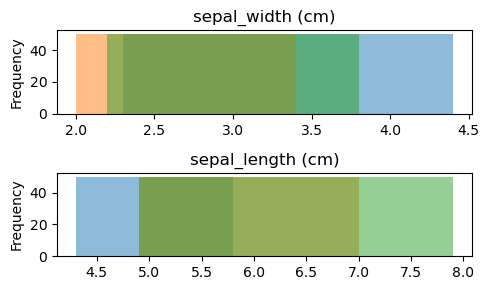

In [23]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 3))
col_name = 'sepal_width'
for class_name, group in df.groupby('class'):
    group[col_name].plot(kind='hist', ax=ax1, label=class_name, bins=1, alpha=0.5, title=f'{col_name} (cm)')

col_name = 'sepal_length'
for class_name, group in df.groupby('class'):
    group[col_name].plot(kind='hist', ax=ax2, label=class_name, bins=1, alpha=0.5, title=f'{col_name} (cm)')

plt.tight_layout() #minimalizuje nakładanie się treści
plt.show()

![sl_sw_hist_ranges1](sl_sw_hist_ranges1.png "Sepal length sepal width ranges")

Na krańcach zakresów wartości otrzymujemy niemal stuprocentową rozróżnialność gatunków już na podstawie pojedynczej cechy (zakresy w zielonych ramkach).<br>
Dla wartości z zakresu środkowego (czerwone ramki) otrzymujemy najmniejszą rozróżnialność. Z podobnym prawdopodobieństwem może to być każdy z 3 gatunków.<br>
Dla pozostałych zakresów (bez ramek) mogą wystąpić 2 z 3 gatunków.<br>
Korzystne jest to, że już przy 2 cechach, w "jednoznacznych" zakresach (zielone ramki) występują wszystkie 3 gatunki. To zwiększa szanse na dokładne określenie gatunku w przypadku gdy wartości pewnych cech wypadną w mniej "jednoznacznych" zakresach. Jeśli taka prawidłowość występuje także dla petal_width i petal_length to będzie to duże ułatwienie przy dokładnym określaniu gatunku.

### Analiza petal_length

Text(0.5, 1.0, 'Histogram zbiorczy petal_length dla wszystkich gatunków')

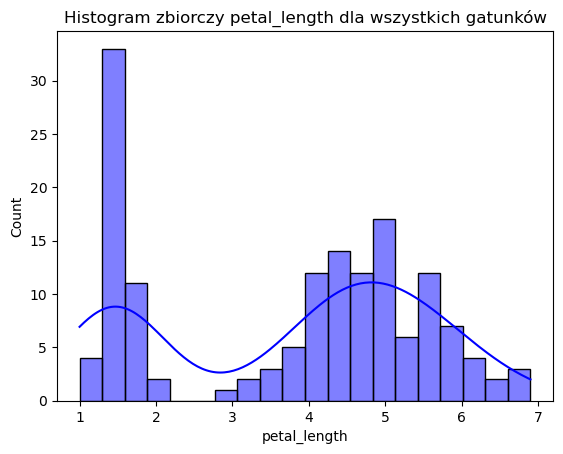

In [24]:
colName = 'petal_length'
sns.histplot(df[colName], kde=True, color='blue', bins=20)
plt.title(f'Histogram zbiorczy {colName} dla wszystkich gatunków')

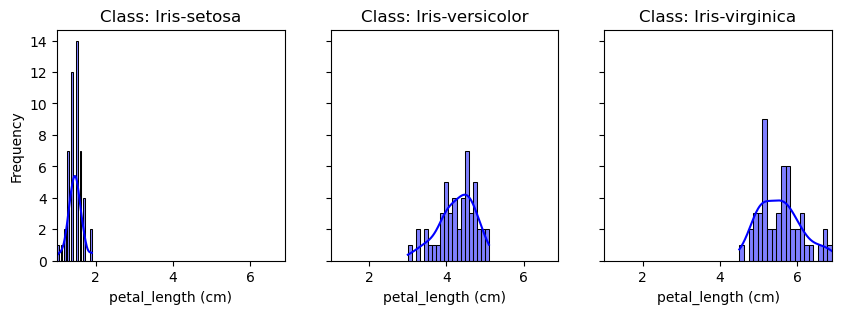

In [25]:
col_name = 'petal_length'

# Create a histogram for each unique class
unique_classes = df['class'].unique()

# Set up the plot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3), sharey=True)

# Iterate over each unique class and create a histogram
for ax, iris_class in zip(axes, unique_classes):
    subset = df[df['class'] == iris_class]
    sns.histplot(subset[col_name], kde=True, ax=ax, color='blue', bins=20)
    ax.set_xlim(df[col_name].min(), df[col_name].max())# I need to see every chart with the same X scale to easier compare
    ax.set_title(f'Class: {iris_class}')
    ax.set_xlabel(col_name + ' (cm)')
    ax.set_ylabel('Frequency')

Text(0.5, 0, 'petal_length (cm)')

<Figure size 1000x600 with 0 Axes>

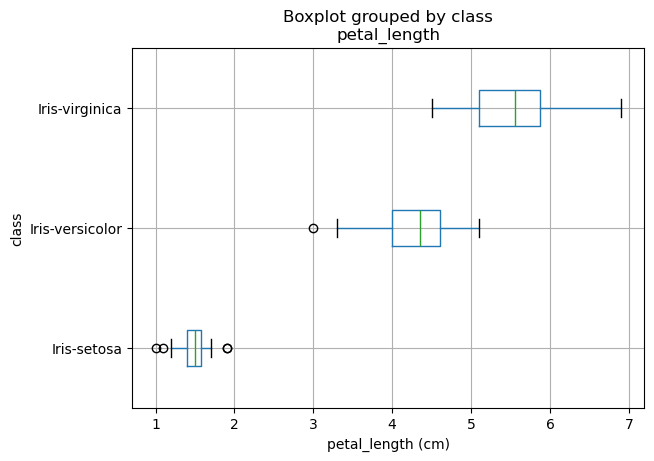

In [26]:
col_name = 'petal_length'
plt.figure(figsize=(10, 6))
df.boxplot(column=col_name, by='class', vert=False)
plt.xlabel(f'{col_name} (cm)')

* Wartości setosa mocno skupione w okolicy minimum. Wykres symetryczny. Pojawiają się wartości odstające (outliers) po obu stronach zakresu.
* Versicolor po środku. Wykres asymetryczny, wartości bardziej rozproszone na lewo, w kierunku minimum. Występują wartości odstające (outliers) po stronie minimum.
* Virginica w okolicy wartości najwyższych. Wykres w miarę symetryczny. Lekkie rozproszenie wartości z prawej strony w okolicy wartości maksymalnych. Płaski szczyt.

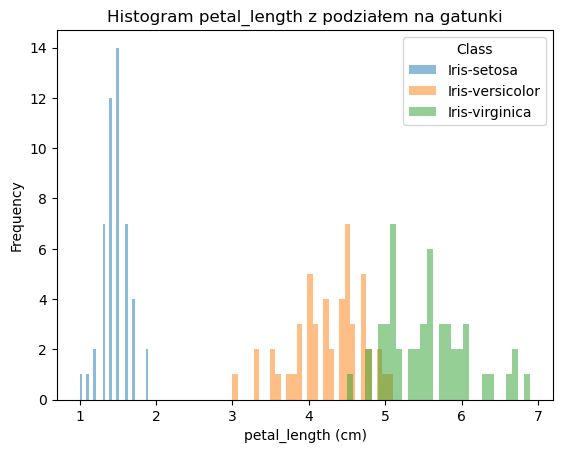

In [27]:
col_name = 'petal_length'
for class_name, group in df.groupby('class'):
    group[col_name].plot(kind='hist', alpha=0.5, label=class_name, bins=30)
    
plt.title(f'Histogram {col_name} z podziałem na gatunki')
plt.xlabel(f'{col_name} (cm)')
plt.ylabel('Frequency')
plt.legend(title='Class')

Widać wyraźną separację wartości gatunku setosa. Pozostałe 2 gatunki mają niewielki zakres wspólny, na brzegach swoich zakresów (maks. versicolor i min. virginica). 

### Analiza petal_width

Text(0.5, 1.0, 'Histogram zbiorczy petal_width dla wszystkich gatunków')

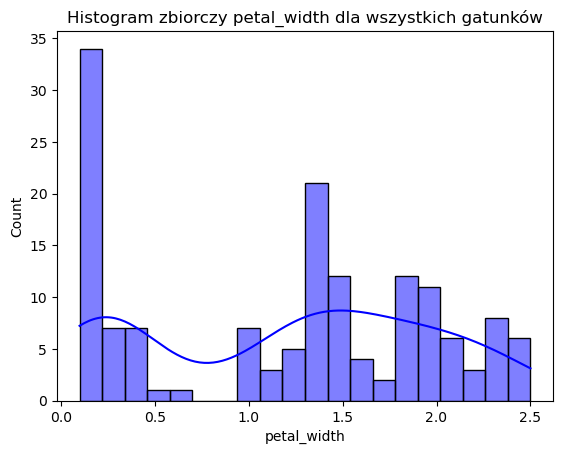

In [28]:
colName = 'petal_width'
sns.histplot(df[colName], kde=True, color='blue', bins=20)
plt.title(f'Histogram zbiorczy {colName} dla wszystkich gatunków')

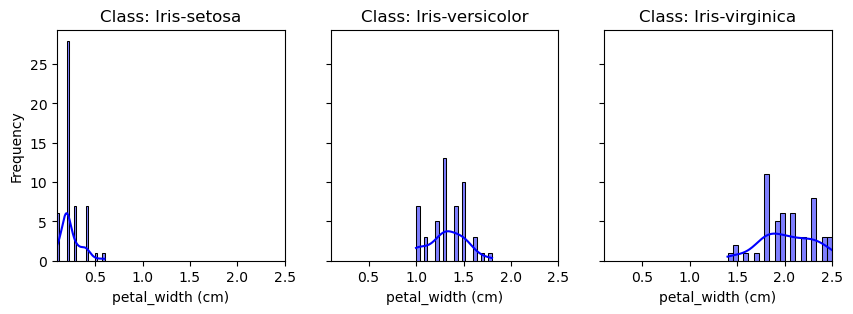

In [29]:
col_name = 'petal_width'

# Create a histogram for each unique class
unique_classes = df['class'].unique()

# Set up the plot
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 3), sharey=True)

# Iterate over each unique class and create a histogram
for ax, iris_class in zip(axes, unique_classes):
    subset = df[df['class'] == iris_class]
    sns.histplot(subset[col_name], kde=True, ax=ax, color='blue', bins=20)
    ax.set_xlim(df[col_name].min(), df[col_name].max())# I need to see every chart with the same X scale to easier compare
    ax.set_title(f'Class: {iris_class}')
    ax.set_xlabel(col_name + ' (cm)')
    ax.set_ylabel('Frequency')

Text(0.5, 0, 'petal_width (cm)')

<Figure size 1000x600 with 0 Axes>

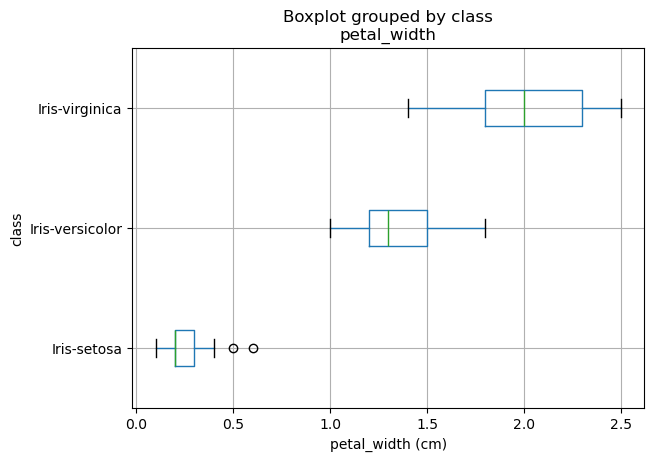

In [30]:
col_name = 'petal_width'
plt.figure(figsize=(10, 6))
df.boxplot(column=col_name, by='class', vert=False)
plt.xlabel(f'{col_name} (cm)')

* Wartości setosa mocno skupione w okolicy minimum. Wykres asymetryczny, wartości rozproszone w kierunku maks. Występują wartości odstające (outliers) po stronie maksimum.
* Versicolor po środku. Wykres lekko asymetryczny, wartości bardziej rozproszone na prawo, w kierunku maksimum.
* Virginica w okolicy wartości najwyższych. Wykres w miarę symetryczny. Rozproszenie wartości z prawej strony w okolicy wartości maksymalnych. Płaski szczyt.

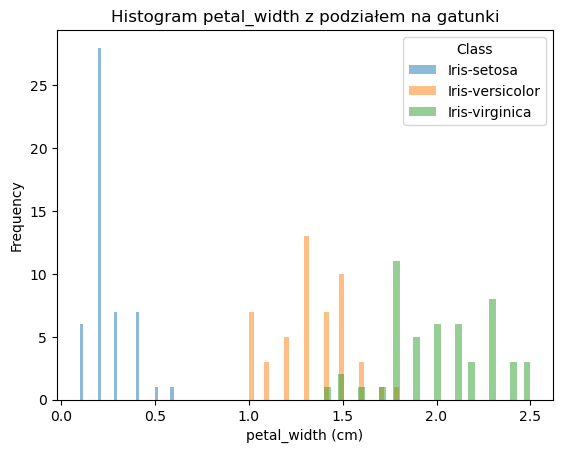

In [31]:
col_name = 'petal_width'
for class_name, group in df.groupby('class'):
    group[col_name].plot(kind='hist', alpha=0.5, label=class_name, bins=30)
    
plt.title(f'Histogram {col_name} z podziałem na gatunki')
plt.xlabel(f'{col_name} (cm)')
plt.ylabel('Frequency')
plt.legend(title='Class')

Widać wyraźną separację wartości gatunku setosa. Pozostałe 2 gatunki mają niewielki zakres wspólny, na brzegach swoich zakresów (maks. versicolor i min. virginica). Zależność bardzo podobna jak w przypadku petal_length.

### Analiza zbiorcza petal_length i petal_width

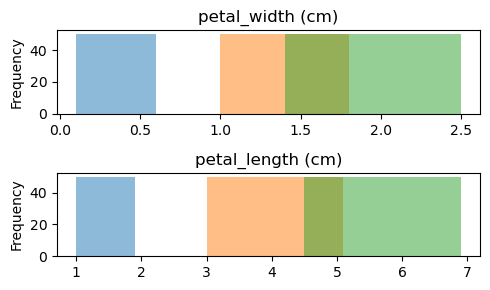

In [32]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 3))
col_name = 'petal_width'
for class_name, group in df.groupby('class'):
    group[col_name].plot(kind='hist', ax=ax1, label=class_name, bins=1, alpha=0.5, title=f'{col_name} (cm)')

col_name = 'petal_length'
for class_name, group in df.groupby('class'):
    group[col_name].plot(kind='hist', ax=ax2, label=class_name, bins=1, alpha=0.5, title=f'{col_name} (cm)')

plt.tight_layout() #minimalizuje nakładanie się treści
plt.show()

![pl_pw_hist_ranges](pl_pw_hist_ranges.png "Petal length petal width ranges")

Zarówno dla petal_length i petal_width widać wyraźną separację wartości gatunku setosa. Pozostałe 2 gatunki mają niewielki zakres wspólny na brzegach swoich zakresów (maks. versicolor i min. virginica). Jednoznaczna rozróżnialność gatunków, na podstawie tych cech, wydaje się być znacznie łatwiejsza niż na podstawie cech sepal_length i sepal_width. Przeważają zakresy (zielone ramki), w których można jednoznacznie określić gatunek. Istnieją niewielkie zakresy, dla których mogą wystąpić 2 z 3 gatunków.<br>
Dla obu cech, 3 gatunki zajmują te same pozycje względne na histogramie wartości tj.:
* setosa wyraźnie z lewej przy minimum
* versicolor w środku
* virginica z prawej przy maks. 

## Korelacje między danymi

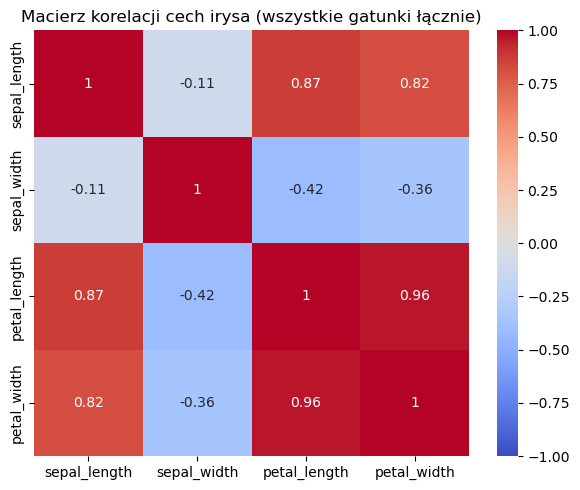

In [33]:
corr = df.iloc[:, :-1].corr()

# Wykres macierzy korelacji z kolorowaniem
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Macierz korelacji cech irysa (wszystkie gatunki łącznie)')
plt.tight_layout()
plt.show()

* Widać bardzo silną pozytywną korelację pomiędzy petal_width i petal_length. Wynika z tego, że proporcje wymiarów płatków dla bardzo wielu badanych roślin są bardzo podobne niezależnie od gatunku.
* Widać silną pozytywną korelację pomiędzy sepal_length i petal_length oraz sepal_length i petal_width. To dość oczywiste, że skoro sepal_length koreluje z jedną z cech petal to musi też korelować podobnie z drugą, bo obie cechy petal korelują wzajemnie ze sobą bardzo silnie. Widać, że im większy petal (płatek), tym dłuższy sepal (kielich).
* Co ciekawe, sepal_width koleruje już odwrotnie z obiema cechami petal. Nieco silniej z petal_length. Oznacza to, że dla wielu roślin im większy petal(płatek) i dłuższy kielich(sepal) tym kielich(sepal) cieńszy. Jest to korelacja znacznie mniejsza niż wyżej wymieniane więc może dotyczyć jedynie części gatunków a może zachowuje się jeszcze inaczej - do dokładniejszego sprawdzenia w dalszej części.
* Korelacja wzajemna sepal_length z sepal_width jest także odwrotna, zgodnie z wcześniej omówioną korelacją ale jej wartość wskazuje, że jest mało istotna. Pytanie czy tak samo będzie przy analizie gatunków osobno.

Sprawdźmy korelacje z podziałem na gatunki.

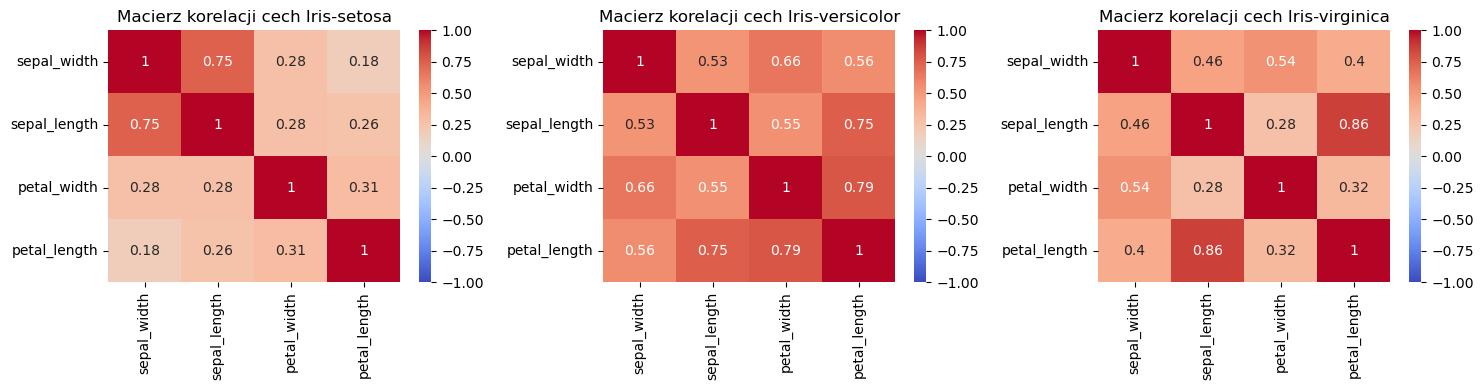

In [34]:
class_names = df['class'].unique()
fig, axes = plt.subplots(1, len(class_names), figsize=(15, 4))

for ax, class_name in zip(axes, class_names):
    group = df[df['class'] == class_name]
    corr = group[["sepal_width", "sepal_length", "petal_width", "petal_length"]].corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, ax=ax)
    ax.set_title(f'Macierz korelacji cech {class_name}')

plt.tight_layout()
plt.show()

Powyższe wyniki pokazują bardzo ciekawy efekt. Korelacja sepal_width z petal_length i petal_width nie tylko różni się bardzo między gatunkami ale także wszędzie osiąga wartości dodatnie, odwrotnie jak w przypadku korelacji zbiorowej dla wszystkich gatunków. Jest to zapewne związane z tzw. paradoksem Simpsona kiedy globalny trend może być odwrotny do trendów w każdej podgrupie.

Podobnie jest z korelacją sepal_width i sepal_length. Tu także mamy ujemne wartości dla wykresu zbiorczego a dodatnie dla poszczególnych gatunków. Wartości też bardzo się różnią. Najwyższa pozytywna korelacja dla setosa i mniejsze ale także istotne dla versicolor i virginica.

Przyjrzyjmy się dokładniej trendom dla korelacji sepal_width z petal_length. 

Text(0.5, 1.0, 'Wszystkie gatunki łącznie')

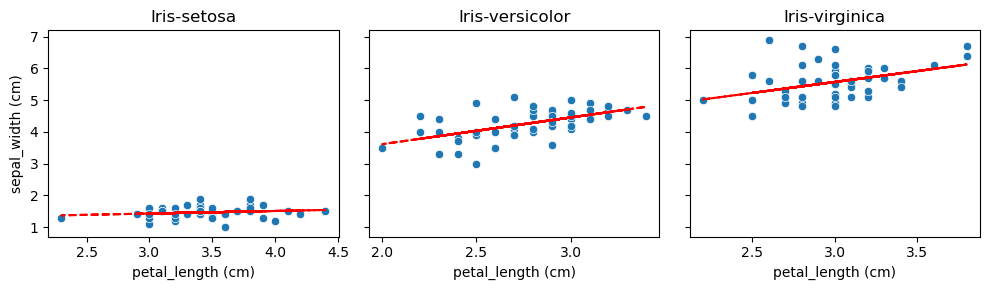

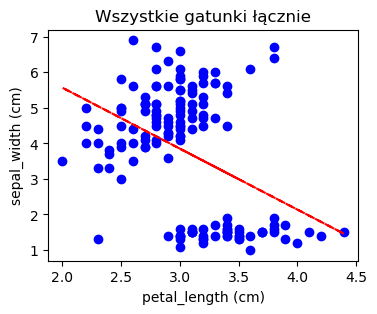

In [35]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharey=True)
cols = ['sepal_width', 'petal_length']

classes = df['class'].unique()
for i, iris_class in enumerate(classes):
    class_data = df[df['class'] == iris_class]
    sns.scatterplot(ax=axes[i], x=cols[0], y=cols[1], data=class_data)
    z = np.polyfit(class_data[cols[0]], class_data[cols[1]], 1)
    p = np.poly1d(z)
    axes[i].plot(class_data[cols[0]], p(class_data[cols[0]]), "r--")

    axes[i].set_title(iris_class)
    axes[i].set_xlabel(f'{cols[1]} (cm)')
    if i == 0:
        axes[i].set_ylabel(f'{cols[0]} (cm)')

plt.tight_layout()

plt.figure(figsize=(4, 3))
plt.scatter(df[cols[0]], df[cols[1]], color='blue', label='Data Points')

# Calculate the trend line
z = np.polyfit(df[cols[0]], df[cols[1]], 1)
p = np.poly1d(z)

# Plot the trend line
plt.plot(df[cols[0]], p(df[cols[0]]), color='red', linestyle='--', label='Trend Line')

# Add labels and title
plt.xlabel(f'{cols[1]} (cm)')
plt.ylabel(f'{cols[0]} (cm)')
plt.title('Wszystkie gatunki łącznie')

Widać wyraźnie odwrotny trend na zbiorczym i osobnych wykresach. Okazuje się, że wniosek na temat sepal_width, będącego w odwrotnej korelacji z pozostałymi cechami jest błędny. Dopiero przy analizie pojedynczych gatunków widać, że sepal_width także rośnie wraz z pozostałymi cechami.

Przyjrzyjmy się dokładniej trendom dla korelacji sepal_width z sepal_length. 

Text(0.5, 1.0, 'Wszystkie gatunki łącznie')

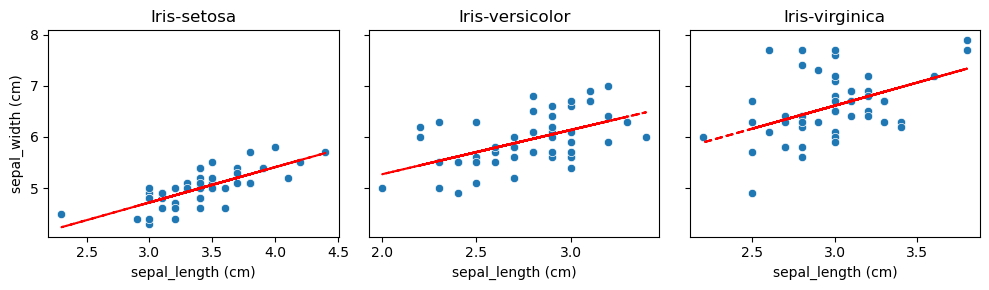

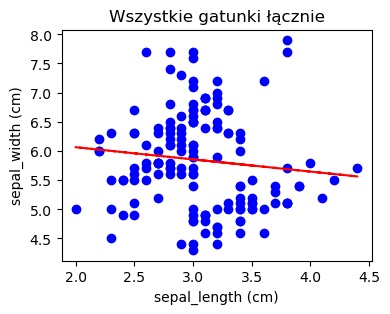

In [36]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharey=True)
cols = ['sepal_width', 'sepal_length']

classes = df['class'].unique()
for i, iris_class in enumerate(classes):
    class_data = df[df['class'] == iris_class]
    sns.scatterplot(ax=axes[i], x=cols[0], y=cols[1], data=class_data)
    z = np.polyfit(class_data[cols[0]], class_data[cols[1]], 1)
    p = np.poly1d(z)
    axes[i].plot(class_data[cols[0]], p(class_data[cols[0]]), "r--")

    axes[i].set_title(iris_class)
    axes[i].set_xlabel(f'{cols[1]} (cm)')
    if i == 0:
        axes[i].set_ylabel(f'{cols[0]} (cm)')

plt.tight_layout()

plt.figure(figsize=(4, 3))
plt.scatter(df[cols[0]], df[cols[1]], color='blue', label='Data Points')

# Calculate the trend line
z = np.polyfit(df[cols[0]], df[cols[1]], 1)
p = np.poly1d(z)

# Plot the trend line
plt.plot(df[cols[0]], p(df[cols[0]]), color='red', linestyle='--', label='Trend Line')

# Add labels and title
plt.xlabel(f'{cols[1]} (cm)')
plt.ylabel(f'{cols[0]} (cm)')
plt.title('Wszystkie gatunki łącznie')

Widać wyraźnie odwrotny trend na zbiorczym i osobnych wykresach. Okazuje się, że wniosek na temat sepal_width, będącego w odwrotnej korelacji z sepal_width jest błędny. Dopiero przy analizie pojedynczych gatunków widać, że wartości sepal_width rosną z wartościami sepal_length.

Korelacja petal_length z petal_width dość mocno różni się między gatunkami. Przyjrzyjmy się dokładniej trendom dla tej korelacji.

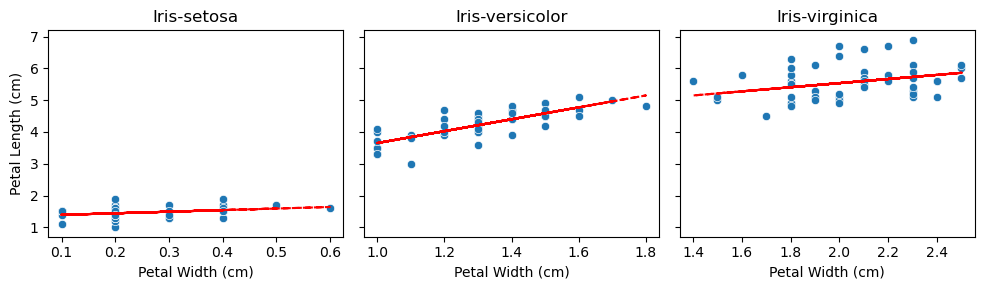

In [37]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3), sharey=True)

classes = df['class'].unique()
for i, iris_class in enumerate(classes):
    class_data = df[df['class'] == iris_class]
    sns.scatterplot(ax=axes[i], x='petal_width', y='petal_length', data=class_data)
    z = np.polyfit(class_data['petal_width'], class_data['petal_length'], 1)
    p = np.poly1d(z)
    axes[i].plot(class_data['petal_width'], p(class_data['petal_width']), "r--")

    axes[i].set_title(iris_class)
    axes[i].set_xlabel('Petal Width (cm)')
    if i == 0:
        axes[i].set_ylabel('Petal Length (cm)')

plt.tight_layout()


Trend korelacji petal_length z petal_width jest pozytywny dla każdego z gatunków osobno, jednak jest wyraźnie silniejszy dla versicolor.<br>

Nanieśmy jeszcze na jeden wspólny wykres cechy, które są w najsilniejszej korelacji. Pomijam tu sepal_width jako najsłabiej skorelowany. Rozmiar punktów reprezentuje wartości sepal_length.

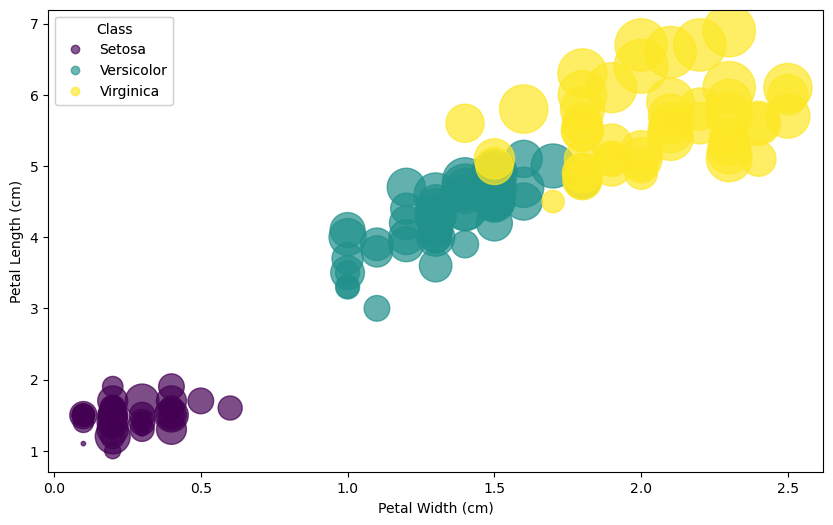

In [38]:
# Min-max normalization function
def min_max_normalize(series, new_min, new_max):
    min_val = series.min()
    max_val = series.max()
    return ((series - min_val) / (max_val - min_val)) * (new_max - new_min) + new_min

# Normalize the sepal_length column to the range 10-1000
df['sepal_length_normalized'] = min_max_normalize(df['sepal_length'], 10, 1500)

# Create a scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    x=df['petal_width'],
    y=df['petal_length'],
    c=pd.Categorical(df['class']).codes,
    s=df['sepal_length_normalized'],  # Scale the size for better visibility
    alpha=0.7,
    cmap='viridis'
)

# Add labels and title
plt.xlabel('Petal Width (cm)')
plt.ylabel('Petal Length (cm)')
plt.title('')

# Add legend
handles, _ = scatter.legend_elements(prop="colors", alpha=0.6)
legend1 = plt.legend(handles, ['Setosa', 'Versicolor', 'Virginica'], title="Class")
plt.gca().add_artist(legend1)

Widać wyraźną, liniową pozytywną korelację między petal_length i petal_width. Widać też, nieznaczny przyrost sepal_length wraz ze wzrostem wartości petal.

## Podsumowanie 

* Dane zawierają 150 rekordów. Opisują wymiary kielicha i płatków kwiatów irysa danego gatunku (3 gatunki). Wymiary są podane w centymetrach z dokładnością do 1 mm.
* Ta sama liczba rekordów przypada na każdy z gatunków. Mamy więc do czynienia z bardzo dobrze zbalansowanym zbiorem danych. To dobrze, bo zapewnia to równą reprezentację poszczególnych kategorii i wpływa pozytywnie na wiarygodność wyciąganych wniosków.
* Liczność zbioru nie jest wielka ale wystarczająca do wyciągnięcia sensownych wniosków.
* Dane są kompletne. Nie zawierają brakujących wartości. To dobrze bo dzięki temu wyniki analizy są dokładniejsze.
* Duplikaty występują, ale ich liczba jest niewielka. Mogły wystąpić kwiaty o tych samych wymiarach w takiej ilości w powyższym zbiorze.
* Wartości odstające "outliers" występują ale w niewielkiej liczbie dla każdego z gatunków dla różnych cech. Brak regularności.
* Największą rozróżnialność gatunków otrzymujemy porównując rozmiary płatków (petal_width, petal_length). Zwłaszcza dla gatunku setosa, wyraźnie różniącego się od pozostałych dwóch.
* Mniej precyzyjne rozróżnienie w dość ograniczonym zakresie otrzymamy porównując wymiary kielicha (sepal_width, sepal_length).
* Najsilniej skorelowane są ze sobą wymiary płatka, zwłaszcza dla gatunku versicolor. Oznacza to, że proporcje jego płatków są do siebie najbardziej podobne, niezależnie od rozmiaru.
* Setosa jest gatunkiem irysa o zdecydowanie najmniejszych wymiarach. Średniej wielkości - versicolor. Największy - Virginica. 
